# Implementação Python de redes neurais convolucionais (CNNs)
Implementação de código com a biblioteca Keras para as CNNs:

Importar todas as bibliotecas necessárias

In [1]:
import numpy as np
from PIL import Image
import pandas as pd
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import np_utils 
from keras.layers import Dropout, Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

Carregar o dataset cifar10
https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
(X, y), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


Mostrar algumas imagens do conjunto de treinamento

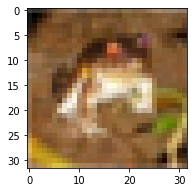

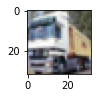

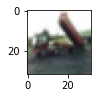

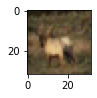

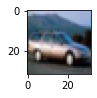

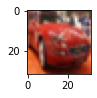

In [3]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(X[i])
    plt.show()

Normalizar os dados

In [4]:
X, X_test = X.astype('float32')/255.0, X_test.astype('float32')/255.0

Converter para categórias

In [5]:
y=np_utils.to_categorical(y, 10)
y_test=np_utils.to_categorical(y_test, 10)

Inicialize o modelo:

In [6]:
model = Sequential()

Adicione camada convolucional com os parâmetros abaixo:

Mapa de características = 32
Tamanho do Kernel = 3x3
Input shape (Forma de entrada) = 32x32
Canals = 3
Preenchimento (padding) = 3 → Significa a mesma dimensão de saída como entrada.

In [7]:
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))

Adicione a taxa de abandono(dropout):

In [8]:
model.add(Dropout(0.2))

Adicione outra camada CNN com preenchimento (padding)  = válido.
preenchimento(padding)  = válido → Significa que a dimensão de saída pode assumir qualquer forma

In [9]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid'))

Adicione uma camada Max Pooling.

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

Achatar os dados:
Em CNNs, é importante nivelar os dados antes de inseri-los na saída ou camada fortemente conectada.

In [11]:
model.add(Flatten())

Adicionar camada densa (fortemente conectada).
Aqui, o número de unidades ocultas é 521.

In [12]:
model.add(Dense(512, activation='relu'))

Adicionar abandono

In [13]:
model.add(Dropout(0.3))

Adicione a camada densa (fortemente conectada) de saída:

In [14]:
model.add(Dense(10, activation='softmax'))

Compilar o modelo

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(momentum=0.5, decay=0.0004), metrics=['accuracy'])

Veja o resumo do modelo para melhor compreensão da arquitetura do modelo

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

Ajuste o algoritmo com 25 épocas:

In [17]:
#treinamento
model.fit(X, y, validation_data=(X_test, y_test), epochs=100,batch_size=512)



Epoch 1/100
98/98 [==============================] - 49s 43ms/step - loss: 2.2512 - accuracy: 0.1586 - val_loss: 2.0916 - val_accuracy: 0.2755
Epoch 2/100
98/98 [==============================] - 3s 35ms/step - loss: 2.0384 - accuracy: 0.2694 - val_loss: 1.9457 - val_accuracy: 0.3117
Epoch 3/100
98/98 [==============================] - 3s 33ms/step - loss: 1.9062 - accuracy: 0.3244 - val_loss: 1.8467 - val_accuracy: 0.3576
Epoch 4/100
98/98 [==============================] - 3s 33ms/step - loss: 1.8357 - accuracy: 0.3498 - val_loss: 1.7860 - val_accuracy: 0.3762
Epoch 5/100
98/98 [==============================] - 3s 33ms/step - loss: 1.7770 - accuracy: 0.3740 - val_loss: 1.7238 - val_accuracy: 0.4109
Epoch 6/100
98/98 [==============================] - 3s 33ms/step - loss: 1.7237 - accuracy: 0.3930 - val_loss: 1.6731 - val_accuracy: 0.4130
Epoch 7/100
98/98 [==============================] - 3s 34ms/step - loss: 1.6785 - accuracy: 0.4090 - val_loss: 1.6387 - val_accuracy: 0.4283
Epoch

Checar acurácidade:

In [18]:
_,acc=model.evaluate(X_test,y_test)
print(acc*100)

313/313 [==============================] - 1s 3ms/step - loss: 1.1652 - accuracy: 0.5937
59.369999170303345


Salva o modelo

In [19]:
model.save("cnn_model.h5")

Faça um dicionário para mapear para as classes de saída e faça previsões a partir do modelo

In [20]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}

A imagem de entrada para predição (classificação) deve ter a forma de um conjunto de dados, ou seja, (32,32,3)

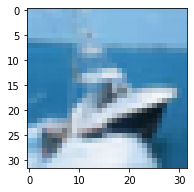

In [23]:

plt.figure(figsize=(20,10))
plt.subplot(332)
plt.imshow(X[8])
plt.show()

In [27]:
im = X[8]
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

8 ship


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
